<a href="https://colab.research.google.com/github/cherryMonth/Neural-Networks/blob/master/Face%20Recognition/face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/davisking/dlib.git

Cloning into 'dlib'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 46871 (delta 0), reused 4 (delta 0), pack-reused 46863
Receiving objects: 100% (46871/46871), 21.98 MiB | 20.77 MiB/s, done.
Resolving deltas: 100% (32940/32940), done.


In [0]:
! rm -rf dlib/build

In [5]:
! cd dlib && mkdir build && cd build && cmake .. -DDLIB_USE_CUDA=0 -DUSE_AVX_INSTRUCTIONS=1 && cmake --build .

-- The C compiler identification is GNU 7.3.0
-- The CXX compiler identification is GNU 7.3.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Using CMake version: 3.12.0
-- Compiling dlib version: 19.16.99
-- Enabling AVX instructions
-- Looking for pthread.h
-- Looking for pthread.h - found
-- Looking for pthread_create
-- Looking for pthread_create - not found
-- Looking for pthread_create in pthreads
-- Looking for pthread_create in pthreads - not found
-- Looking for pthread_create in pthread
-- Looking for pthread_create in pthread - 

In [9]:
! cd dlib && python3 setup.py install --yes USE_AVX_INSTRUCTIONS --yes DLIB_USE_CUDA

running install
running bdist_egg
running egg_info
creating dlib.egg-info
writing dlib.egg-info/PKG-INFO
writing dependency_links to dlib.egg-info/dependency_links.txt
writing requirements to dlib.egg-info/requires.txt
writing top-level names to dlib.egg-info/top_level.txt
writing manifest file 'dlib.egg-info/SOURCES.txt'
package init file 'dlib/__init__.py' not found (or not a regular file)
reading manifest template 'MANIFEST.in'
writing manifest file 'dlib.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
running build_ext
Building extension for Python 3.6.7 (default, Oct 22 2018, 11:32:17) 
Invoking CMake setup: 'cmake /content/dlib/tools/python -DCMAKE_LIBRARY_OUTPUT_DIRECTORY=/content/dlib/build/lib.linux-x86_64-3.6 -DPYTHON_EXECUTABLE=/usr/bin/python3 -DUSE_AVX_INSTRUCTIONS=yes -DDLIB_USE_CUDA=yes -DCMAKE_BUILD_TYPE=Release'
-- The C compiler identification is GNU 7.3.0
-- The CXX compiler identification is GNU 7.3.

In [10]:
! pip3 install face_recognition

    100% |████████████████████████████████| 100.2MB 488kB/s 
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [0]:
! unzip image

In [85]:
import face_recognition
import cv2
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
# 读取图片并识别人脸

img = face_recognition.load_image_file("image/people.jpeg")
face_locations = face_recognition.face_locations(img)
print (face_locations)

[(282, 893, 318, 857), (358, 453, 394, 417), (330, 725, 366, 689), (346, 117, 382, 81), (302, 329, 338, 293), (342, 793, 378, 757), (282, 729, 318, 693), (286, 605, 322, 569), (330, 993, 366, 957), (350, 321, 386, 285), (278, 1057, 314, 1021), (354, 389, 390, 353)]


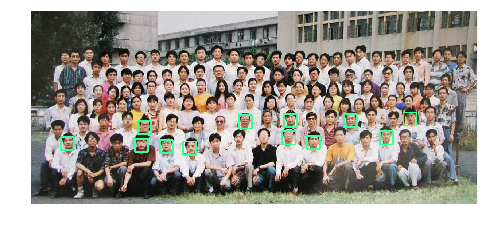

In [69]:
# 遍历每个人脸，并标注
faceNum = len(face_locations)
for i in range(0, faceNum):
    top =  face_locations[i][0]
    right =  face_locations[i][1]
    bottom = face_locations[i][2]
    left = face_locations[i][3]

    start = (left, top)
    end = (right, bottom)

    color = (55,255,155)
    thickness = 3
    cv2.rectangle(img, start, end, color, thickness)
plt.axis('off')
# 显示识别结果
plt.imshow(img)

In [71]:
import face_recognition
a1 = face_recognition.load_image_file("image/a1.jpeg")
a2 = face_recognition.load_image_file("image/a2.jpeg")
m1 = face_recognition.load_image_file("image/m1.jpeg")
m2 = face_recognition.load_image_file("image/m2.jpeg")
un = face_recognition.load_image_file("image/m3.jpg")

a1_en = face_recognition.face_encodings(a1)[0]
a2_en = face_recognition.face_encodings(a2)[0]
m1_en = face_recognition.face_encodings(m1)[0]
m2_en = face_recognition.face_encodings(m2)[0]
un_en = face_recognition.face_encodings(un)[0]

results = face_recognition.compare_faces([a1_en, a2_en, m1_en, m2_en], un_en)
labels = ['奥巴马', '奥巴马', '马云', '马云']

print('results:'+str(results))

for i in range(0, len(results)):
    if results[i] == True:
        print('The person is:'+labels[i])

results:[False, False, True, True]
The person is:马云
The person is:马云


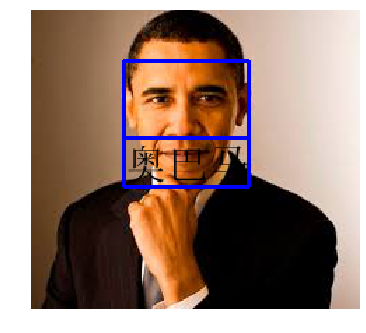

In [99]:
m4 = face_recognition.load_image_file("image/a3.jpeg")
face_locations = face_recognition.face_locations(m4)
face_encodings = face_recognition.face_encodings(m4, face_locations)  # 返回人脸区域的图像

face_names = list()

for face_encoding in face_encodings:
    match = face_recognition.compare_faces([a1_en], face_encoding)
    if match[0]:
        name = u"奥巴马"
    else:
        name = "unknown"
    face_names.append(name)

for (top, right, bottom, left), name in zip(face_locations, face_names):
  cv2.rectangle(m4, (left, top), (right, bottom), (0, 0, 255),  2)

  cv2.rectangle(m4, (left, bottom - 35), (right, bottom), (0, 0, 255), 2)
  font = cv2.FONT_HERSHEY_DUPLEX
  img_PIL = Image.fromarray(cv2.cvtColor(m4, cv2.COLOR_BGR2RGB))
  font = ImageFont.truetype('image/simsun.ttc', 30)
  draw = ImageDraw.Draw(img_PIL)
  fillColor = (0,0,0)
  position = (left+1, bottom - 30)
  draw.text(position, name, font=font, fill=fillColor)
  img = cv2.cvtColor(np.asarray(img_PIL),cv2.COLOR_RGB2BGR)

plt.axis('off')
plt.imshow(img)